# Direct Monte carlo integral evaluation

Consider the function $f(x) = 10\exp(2|x-5|)$ and suppose we want to compute the average $\langle f(x)\rangle$ with $x \sim \mathcal{U}(0, 1)$. This is equivalent to computing the integral
$$
I = \int_0^{10} \exp(2|x-5|)dx
$$
Use the direct method to estimate the integral. Show that with a good choice of the $g(x)$, the importance
sampling method provides a reduction of the variance w.r.to the direct method. (Hint: Show first why the normal distribution $g(x)\sim N (5, 1)$ could be a good reweighting function)

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

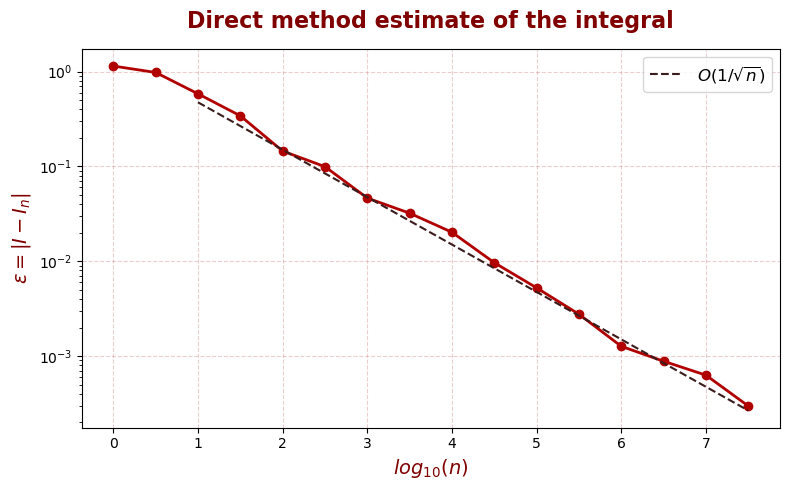

In [4]:
estimate = []
error = []
true_value = (1-np.exp(-10))

for exp in np.arange(0,8,0.5):
    n = int(10**exp)
    tmp = []
    tmp_error = []
    for k in range(20):
        uniform = np.random.uniform(0,1,n)
        uniform_rescaled = uniform * 10
        u_exp = np.exp(-2 * np.abs(uniform_rescaled - 5))
        I_direct = (10 / n) * np.sum(u_exp) 
        Sn  = (1/n) * (np.sum((10*u_exp)**2) - np.sum(I_direct**2))
        err = np.sqrt(Sn)/np.sqrt(n)
        tmp.append(np.abs(true_value-I_direct))
        tmp_error.append(err)
    estimate.append(np.mean(tmp))
    error.append(np.mean(tmp_error))
# Plot it
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,8,0.5), estimate, marker='o', color='#B00000', linewidth=2.0)
#plt.errorbar(np.arange(1,8,0.5), estimate, yerr=error, marker='o', color='#B00000', linewidth=2.0)
plt.title("Direct method estimate of the integral", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("$log_{10}(n)$", fontsize=14, color='#800000')
plt.ylabel(r"$\epsilon = |I - I_{n}|$", fontsize=14, color='#800000')
plt.yscale("log")
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout() 
# reference line
n_values = np.arange(1,8,0.5)
ref_line = [1.5 * 10**(-exp/2) for exp in n_values]
plt.plot(n_values, ref_line, linestyle='--', color='#3B1C1C', label="$O(1/\\sqrt{n})$")
plt.legend(fontsize=12)
#plt.savefig("exercise2_1_direct.pdf", format='pdf')
plt.show()

Now let's perform importanca sampling with $\mathcal{N}(5,1)$

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_77996/390734048.py:27: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(np.arange(0,8,0.5), estimate_importance, marker='o', color='#007BFF', linewidth=2.0, label="Importance Sampling $\mathcal{N}(5,1)$")
/tmp/ipykernel_77996/390734048.py:31: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\epsilon = |I - I_{n}|$", fontsize=14, color='#800000')


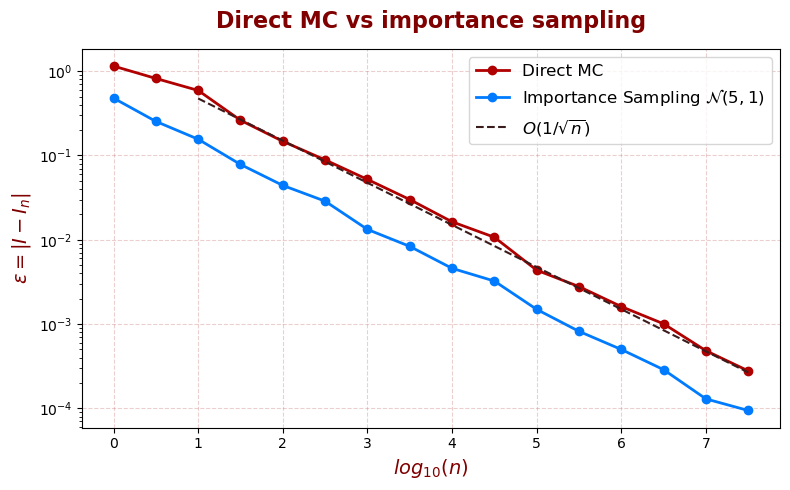

In [5]:
estimate = []
estimate_importance = []   ## IMPORTNANCE SAMPLING WITH G = N(5,1)
true_value = (1-np.exp(-10))

for exp in np.arange(0,8,0.5):
    n = int(10**exp)
    tmp = []
    tmp_importance = []
    for k in range(40):
        uniform = 10*np.random.uniform(0,1,n)
        gaussian = np.random.normal(5,1,n)

        num = np.exp(-2 * np.abs(gaussian - 5))
        den = (1 / (np.sqrt(2 * np.pi) * 1)) * np.exp(-0.5 * ((gaussian - 5) / 1)**2)

        I_direct = (10 / n) * np.sum(np.exp(-2 * np.abs(uniform - 5)))
        I_importance = (1 / n) * np.sum(num / den)

        tmp.append(np.abs(true_value-I_direct))
        tmp_importance.append(np.abs(true_value-I_importance))
    
    estimate_importance.append(np.mean(tmp_importance))
    estimate.append(np.mean(tmp))
# Plot it
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,8,0.5), estimate, marker='o', color='#B00000', linewidth=2.0, label="Direct MC")
plt.plot(np.arange(0,8,0.5), estimate_importance, marker='o', color='#007BFF', linewidth=2.0, label="Importance Sampling $\mathcal{N}(5,1)$")   
#plt.errorbar(np.arange(1,8,0.5), estimate, yerr=error, marker='o', color='#B00000', linewidth=2.0)
plt.title("Direct MC vs importance sampling", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("$log_{10}(n)$", fontsize=14, color='#800000')
plt.ylabel(r"$\epsilon = |I - I_{n}|$", fontsize=14, color='#800000')
plt.yscale("log")
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout() 
# reference line
n_values = np.arange(1,8,0.5)
ref_line = [1.5 * 10**(-exp/2) for exp in n_values]
plt.plot(n_values, ref_line, linestyle='--', color='#3B1C1C', label="$O(1/\\sqrt{n})$")
plt.legend(fontsize=12)
#plt.savefig("exercise2_2_importance.pdf", format='pdf')
plt.show()

---
Again with direct Monte carlo direct method, but with the integral:
$$
I = \int_0^{\frac{\pi}{2}}\cos^2(x)dx
$$

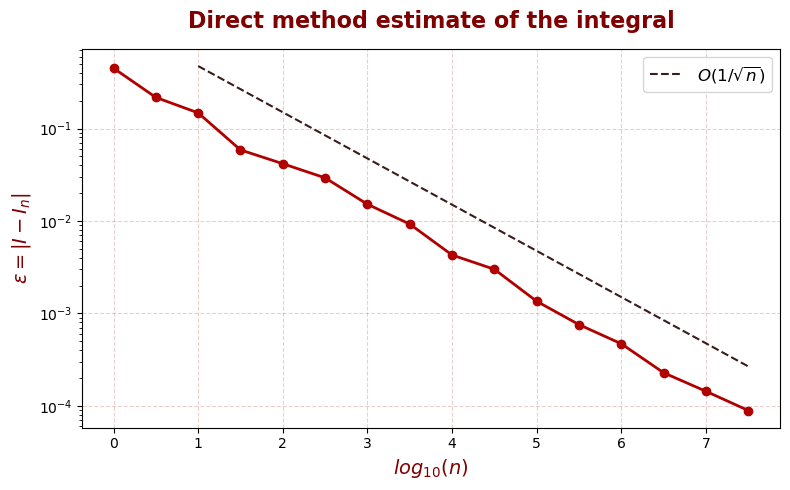

In [7]:
estimate = []
true_value = np.pi/4
for exp in np.arange(0,8,0.5):
    n = int(10**exp)
    tmp = []
    for k in range(20):
        uniform = np.random.uniform(0,1,n)
        uniform_rescaled = uniform * np.pi/2
        xi = np.cos(uniform_rescaled)**2
        I_direct = (np.pi / (2*n)) * np.sum(xi)
        tmp.append(np.abs(true_value-I_direct))
    estimate.append(np.mean(tmp))

plt.figure(figsize=(8,5))
plt.plot(np.arange(0,8,0.5), estimate, marker='o', color='#B00000', linewidth=2.0)
#plt.errorbar(np.arange(1,8,0.5), estimate, yerr=error, marker='o', color='#B00000', linewidth=2.0)
plt.title("Direct method estimate of the integral", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("$log_{10}(n)$", fontsize=14, color='#800000')
plt.ylabel(r"$\epsilon = |I - I_{n}|$", fontsize=14, color='#800000')
plt.yscale("log")
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout() 
# reference line
n_values = np.arange(1,8,0.5)
ref_line = [1.5 * 10**(-exp/2) for exp in n_values]
plt.plot(n_values, ref_line, linestyle='--', color='#3B1C1C', label="$O(1/\\sqrt{n})$")
plt.legend(fontsize=12)
#plt.savefig("exercise2_2_cos.pdf", format='pdf')
plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_77996/2189987165.py:37: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\epsilon = |I - I_{n}|$", fontsize=14, color='#800000')


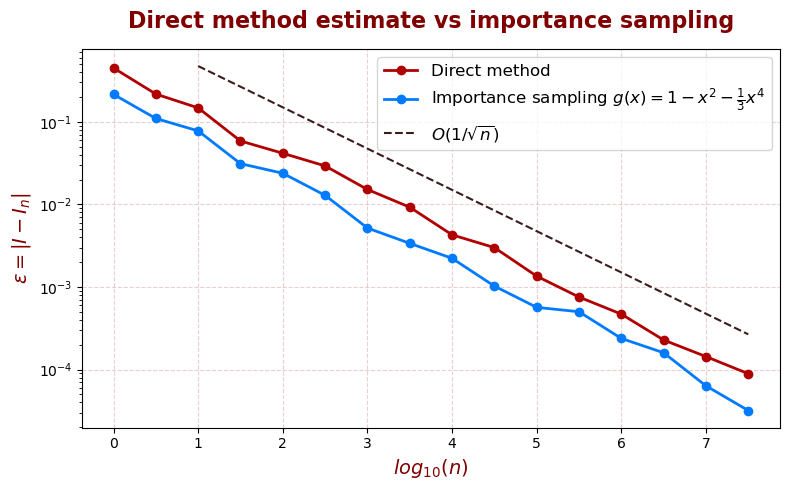

On average, the error has decrease by 51.7951792895319 %


In [8]:
# Now with importance sampling
def IntegrateImportanceSampling(b,c):
    def g(x): # unnormalized g(x)
        return 1+b*(x**2) + c*(x**4)
    Z = np.pi/2 + b* (np.pi**3)/24 + c*(np.pi**5)/160  # cache the renormalization

    def sampleFromg(n):
        samples = []
        while len(samples) < n:
            x = (np.pi/2) * np.random.uniform(0,1, n)
            y = np.random.uniform(0,1,n)   # since the maximum of g(x) is 1 for our b,c
            gx = g(x)
            samples.extend(x[gx > y])
        samples = samples[:n]
        return np.array(samples)

    estimate = []
    true_value = np.pi/4
    for exp in np.arange(0,8,0.5):
        n = int(10**exp)
        tmp = []
        for k in range(20):
            xi = sampleFromg(n)
            ratio = Z* np.cos(xi)**2 / (g(xi))
            I_is = np.mean(ratio)
            tmp.append(np.abs(true_value-I_is))
        estimate.append(np.mean(tmp))
    return estimate

estimate_around0 = IntegrateImportanceSampling(b=-1, c=1./3.)

plt.figure(figsize=(8,5))
plt.plot(np.arange(0,8,0.5), estimate, marker='o', color='#B00000', label = "Direct method", linewidth=2.0)
plt.plot(np.arange(0,8,0.5), estimate_around0, marker='o', color='#007BFF', label = r"Importance sampling $g(x) = 1 - x^2 - \frac{1}{3}x^4$", linewidth=2.0)
plt.title("Direct method estimate vs importance sampling", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("$log_{10}(n)$", fontsize=14, color='#800000')
plt.ylabel(r"$\epsilon = |I - I_{n}|$", fontsize=14, color='#800000')
plt.yscale("log")
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout() 
# reference line
n_values = np.arange(1,8,0.5)
ref_line = [1.5 * 10**(-exp/2) for exp in n_values]
plt.plot(n_values, ref_line, linestyle='--', color='#3B1C1C', label="$O(1/\\sqrt{n})$")
plt.legend(fontsize=12)
#plt.savefig("exercise3_2_importance.pdf", format='pdf')
plt.show()

percentage_decrease = [1- est_around0 / est for est, est_around0 in zip(estimate, estimate_around0)]
print("On average, the error has decrease by", np.mean(percentage_decrease)*100, "%")